# HW 1. Data Analysis with Seaborn Tips dataset

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Load dataset and brief data description

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info()
tips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [5]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [6]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [7]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Data Visualization

### Visualization including dependent variable ("tip")

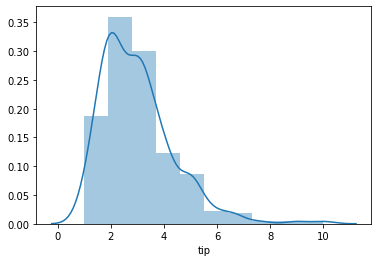

In [8]:
sns.distplot(tips['tip'], bins=10)

#### Histogram shows that the tip is left-skewed.

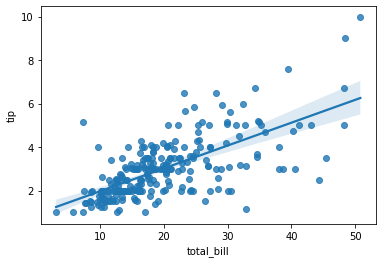

In [9]:
sns.regplot(x="total_bill", y="tip", data=tips)

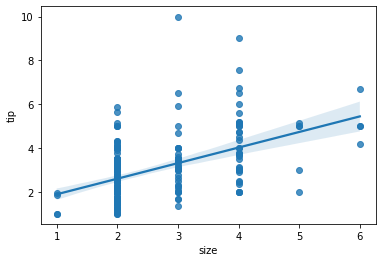

In [10]:
sns.regplot(x="size", y="tip", data=tips)

#### Moreover, above scatterplots show that the linear relationship can be seen between tip, total_bill, and size.
#### This implies the applicability of linear regression, althought high correlation among these two independent variables may exist.

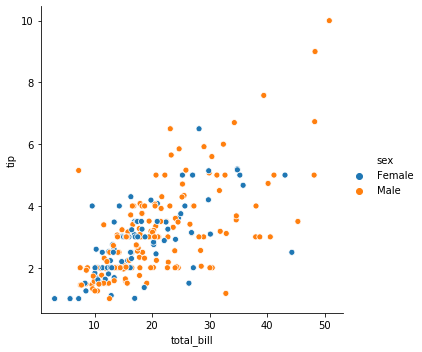

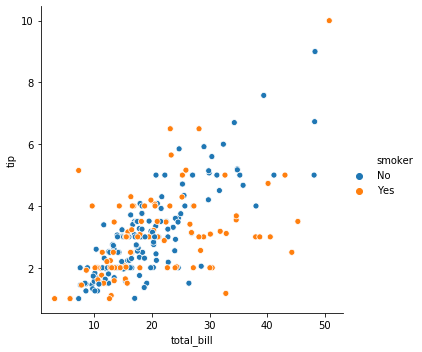

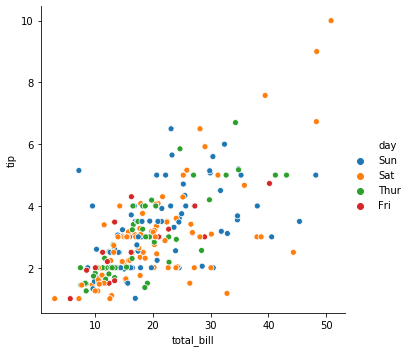

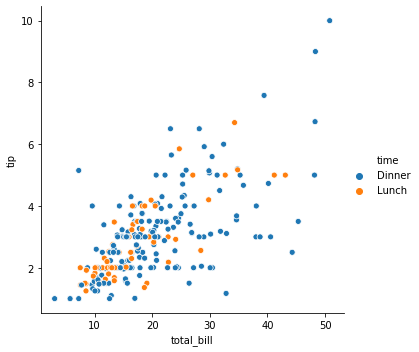

In [11]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
sns.relplot(x="total_bill", y="tip", hue="time", data=tips)

#### After adding colors to scatterplot by its categories, it can be seen that the linearity is still maintained.

### Visualization between independent variables

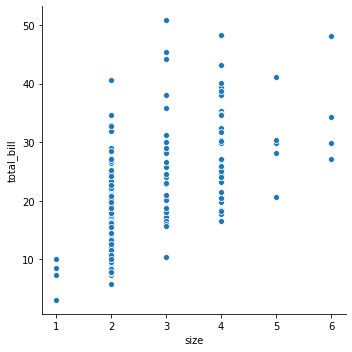

In [12]:
sns.relplot(x="size", y="total_bill", data=tips)

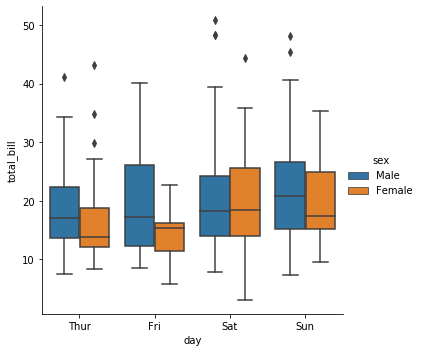

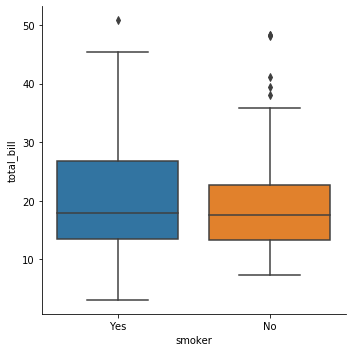

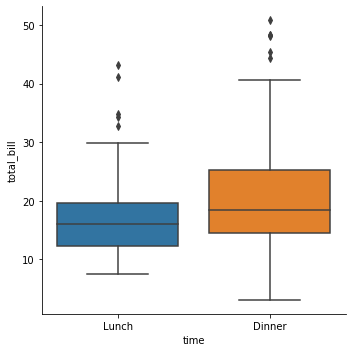

In [13]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips)
sns.catplot(x="smoker", y="total_bill", kind="box", data=tips)
sns.catplot(x="time", y="total_bill", kind="box", data=tips)

#### Above boxplots show that while the men usually spend more total_bill compared to the women almost everyday except saturday,
#### smoking status does not affect much to the total_bill size and people do pay more for their dinner than the lunch.

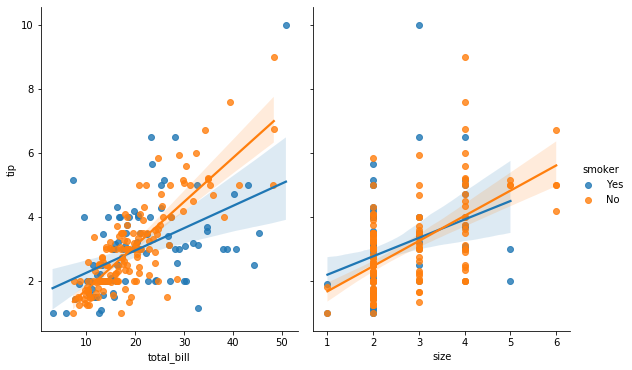

In [14]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"], hue="smoker", height=5, aspect=.8, kind="reg")

#### However, although smoking status does not affect much to the total_bill itself, it affects the sensitivity to the willingness to pay tip.
#### As the slope seen in the above regression lines shows, non-smoking people do have steeper slope for tip than the smokers given the total_bill and size.
#### This may imply that the non-smokers react more sensitively to the quality of service that they receive.

## Multiple Linear Regression

#### Before analysis, check if there's any null value

In [15]:
tips.isnull().values.any()

False

#### Define dependent variable (tip) as y and independent variables (total_bill and size) as x

In [16]:
y = tips['tip']
x = tips[['total_bill', 'size']]

#### Establish scikit-learn linear regression model and print the results

In [17]:
linear_regression = LinearRegression()
linear_regression.fit(X = x, y = y)
prediction = linear_regression.predict(X = x)
print('Intercept: ', linear_regression.intercept_)
print('Coefficients: ', linear_regression.coef_)

Intercept:  0.6689447408125031
Coefficients:  [0.09271334 0.19259779]


#### This results to the following model:
## tips = 0.09271334 total_bill + 0.19259779 size

### R-squared and Adjusted R-squared

In [18]:
r2 = linear_regression.score(X=x, y=y)
print("r-squared = ", r2)

r-squared =  0.46786930879612587


### About 46.79% of changes in dependent variable, tip, can be explained by independent variables in this model 